# Opentrons Mass Balance Automation 

## Aniket Chitre

### 0. Import Packages

In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import time
import serial
import csv

### 1. Port for Mass Balance

Find the port number on Windows through Device Manager or on Mac through running this command (`ls /dev/tty.*`) on the Terminal

In [2]:
#port = '/dev/tty.usbserial-14130'
port = 'COM5'

### 2. Function to Read Mass from Balance

In [3]:
def get_mass(port):
    try:
        balance = serial.Serial(port, 9600, xonxoff=True) # check COM port and xonxoff (handshake) = True default for MT balance
        balance.write('S\r\n'.encode('utf-8'))
        time.sleep(1)
        result  = balance.read_until('\r\n'.encode('utf-8'))
        value = str(result[7:14].decode("utf-8"))
        #balance.close()
        if (value.strip() != '-------') and (value.strip() != ''):
            return (True,float(value))
        return (False,-1)
    except:
        return (False,-1)

### 3. Real-time Data

In [4]:
x = [] #store time here 
mass = [] #store mass here
i = 0

while True:
    x.append(i*2)
    
    status, val = get_mass(port)
    if status == True:
        curr_val = val
    else:
        curr_val = mass[-1]
        
    print(curr_val)
    mass.append(curr_val)
    
    time.sleep(1)
    i += 1

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-0.001
0.0
0.0
-0.002
-0.003
-0.002
-0.002
-0.001
-0.001
0.001
-0.002
-0.002
-0.001
0.0
-0.004
-0.004
0.998
0.999
1.001
1.0
1.0
2.002
2.002
2.002
2.002
3.005
3.005
3.005
3.005
4.006
4.006
4.005
4.005
5.001
5.004
5.005
5.005
5.005
6.002
6.005
6.006
6.005
6.005
6.646
6.646
6.646
7.286
7.286
7.286
7.286
7.287
8.288
8.287
8.286
8.286
9.284
9.284
9.282
9.283
10.281
10.284
10.285
10.284
10.285
11.282
11.284
11.286
11.285
11.285
12.288
12.288
12.287
12.287
13.283
13.286
13.288
13.287
13.287
13.923
13.922
13.921
13.92
14.553
14.556
14.557
14.555
14.555
15.551
15.553
15.555
15.554
15.554
16.557
16.557
16.556
16.556
17.556
17.556
17.556
17.556
18.553
18.556
18.557
18.557
18.557
19.555
19.554
19.554
19.554
20.552
20.551
20.55
20.55
21.319
21.317
21.317
21.317
22.08
22.08
22.078
22.078
23.081
23.081
23.079
23.079
24.082
24.082
24.08
24.08
25.084
25.084
25.081
25.081
26.086
26.084

57.809
57.808
57.808
57.808
57.808
57.808
57.807
57.806
57.806
57.805
57.805
57.831
57.86
57.894
57.929
57.964
58.001
58.037
58.066
58.066
58.066
58.066
58.066
58.066
58.065
58.065
58.065
58.065
58.065
58.065
58.074
58.073
58.073
58.073
58.073
58.072
58.074
58.074
58.073
58.073
58.073
58.071
58.071
58.071
58.07
58.07
58.071
58.071
58.071
58.071
58.069
58.069
58.069
58.069
58.069
58.069
58.069
58.069
58.069
58.069
58.069
58.068
58.068
58.068
58.068
58.068
58.068
58.068
58.068
58.067
58.065
58.065
58.065
58.065
58.065
58.094
58.129
58.164
58.199
58.238
58.275
58.276
58.314
58.353
58.353
58.353
58.352
58.352
58.366
58.366
58.365
58.365
58.365
58.364
58.364
58.365
58.363
58.363
58.364
58.361
58.364
58.363
58.364
58.364
58.364
58.364
58.364
58.363
58.363
58.363
58.363
58.363
58.363
58.363
58.361
58.361
58.362
58.362
58.361
58.361
58.361
58.361
58.361
58.361
58.361
58.361
58.361
58.361
58.361
58.361
58.358
58.358
58.358
58.357
58.357
58.383
58.415
58.451
58.488
58.523
58.523
58.523
58.523
58

KeyboardInterrupt: 

In [5]:
results = {'Time': x, 'Mass': mass}

### 4. Plotting and Exporting Data

In [6]:
mass_df = pd.DataFrame(results)
mass_df

,Time,Mass
0,0,0.000
1,2,0.000
2,4,0.000
3,6,0.000
4,8,0.000
...,...,...
1633,3266,61.057
1634,3268,61.053
1635,3270,61.052
1636,3272,61.052


<IPython.core.display.Javascript object>


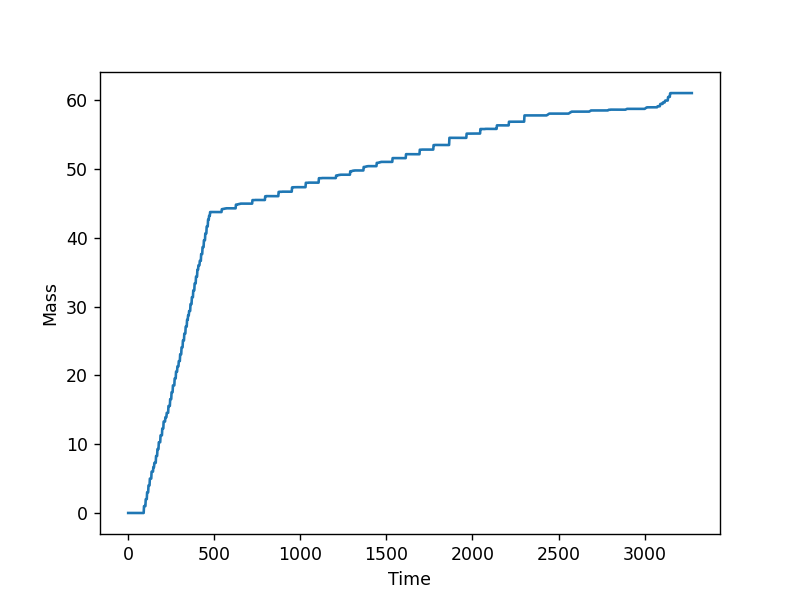

In [7]:
sns.lineplot(x='Time', y='Mass', data=mass_df);

In [8]:
mass_df.to_csv('mass_data/MassProfile_060323_S121-126.csv')